### Algorithm overview

- Compute distance between each pair of in-nodes and out-nodes (geodesic distance on globe, later "distance" can be modified to include trade barriers, etc.)
- Probability/affinity of edge between (u,v) is proportional to in(u) * in(v) / dist(u,v)
- Connect nodes and assign weights according to iterative proportional fitting
- Validate data: pred_exp = sum(outflows from grid cells in i that are international edges) (same for imports)
- Note that the validation step doesn't actually test the network, it just looks at the net flow
- TODO: as of now, we just look at marginals (total imports and exports) rather than country flows. The model would be better if we train it on the marginals (force the network to match exisitng import and export values) and then compare it with actual data.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model with thresholding at 20% of possible edges...
Edges after gravity calculation: 7982660
After thresholding there are 2823226 edges containing 99.8% of total flow mass
Number of nodes after thresholding: 14623
Percent of inflow contained in remaining nodes: 100.0%
Percent of outflow contained in remaining nodes: 100.0%
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 2823226
IPF converged in 28 iterations
IPF complete. Flow matrix generated with 2823226 edges.


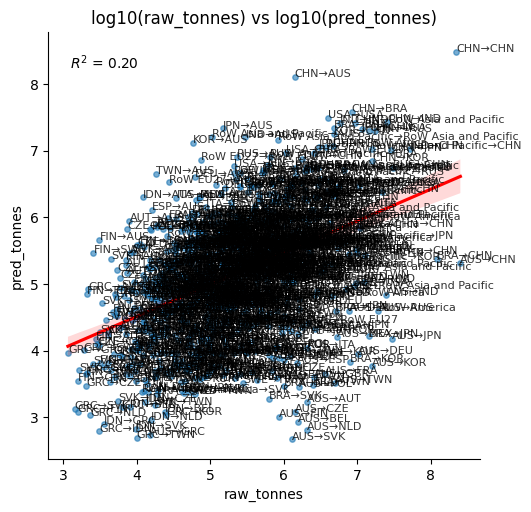

In [30]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_1.csv')

fn = FlowNetwork(grid_data_path, 'prod_outflow', 'prod_inflow', time='2016')
fn.gravity_model(threshold_percentile=20, verbose=verbose)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
fn.bilateral_flow(2016, json_path)
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=False)
# fn.plot_network_map(caption=None, num_edges=500, vmin=None, vmax=None, color='coolwarm', levels=6, edge_thickness=1, edge_alpha=0.5, edge_color='gray')
# fn.check_mass_conservation(tol=1e-6, verbose=verbose)
# fn.analyze_degree_distribution(caption=None, verbose=verbose)
# fn.compute_marginal_country_trade(out_path=None, verbose=verbose)

# fn.compare_model_with_trade_data(trade_csv_path, "Fe_import", pred_col="estimated_imports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)
# fn.compare_model_with_trade_data(trade_csv_path, "Fe_export", pred_col="estimated_exports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)


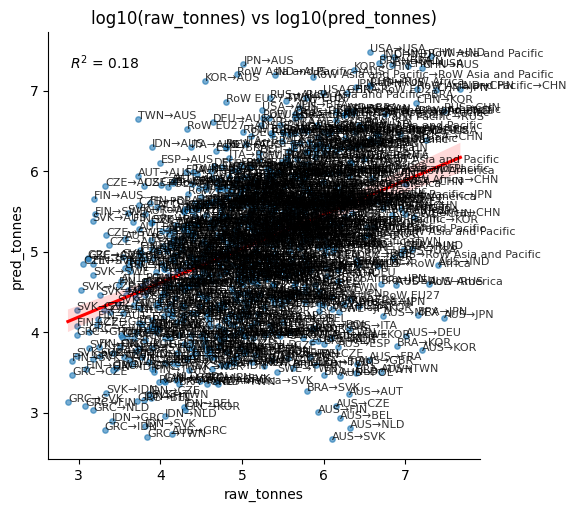

In [32]:
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=True)